# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# Leer el archivo Excel
df = pd.read_csv('datos_modelo_entrada_aire_compresor/2025/2025_02.csv', sep=';', decimal=".", low_memory=True)

C:\Users\UF183530\AppData\Local\Temp\ipykernel_12708\607503955.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datos_modelo_entrada_aire_compresor/2025/2025_02.csv', sep=';', decimal=".", low_memory=True)


In [53]:
# Convertir la primera columna a datetime con zona horaria
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], errors='coerce', utc=True)

# Reemplazar "," por "." en todas las columnas antes de convertirlas a numéricas
for col in df.columns[1:]:  # Excluir la primera columna (timestamps)
    df[col] = df[col].astype(str).str.replace(',', '.', regex=True)  # Convertir a string y reemplazar
    df[col] = df[col].str.replace('NOT ON', '0', regex=False)  # Reemplazar "NOT ON" por "0"
    df[col] = df[col].str.replace('On', '1', regex=False)  # Reemplazar "ON" por "1"
    

    # Convertir la columna a numérico, dejando NaN donde había texto
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [54]:
df = df[df["SAB:G1.DWATT"] > 145]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22610 entries, 0 to 40320
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Timestamp                            22610 non-null  object 
 1   SAB:G1.CTIM                          22608 non-null  float64
 2   SAB:G1.ATID                          22608 non-null  float64
 3   SAB:G1.AFPAP                         22596 non-null  float64
 4   SAB:G1.DWATT                         22610 non-null  float64
 5   SAB:G1.CSGV                          22605 non-null  float64
 6   SAB:G1.CTD                           22605 non-null  float64
 7   SAB:G1.CPD                           22598 non-null  float64
 8   SAB:G1.CSBHX                         22604 non-null  float64
 9   SAB:G1.CQBH_m                        22610 non-null  float64
 10  SAB:G1.FSR                           22610 non-null  float64
 11  SAB:G1.FQG                       

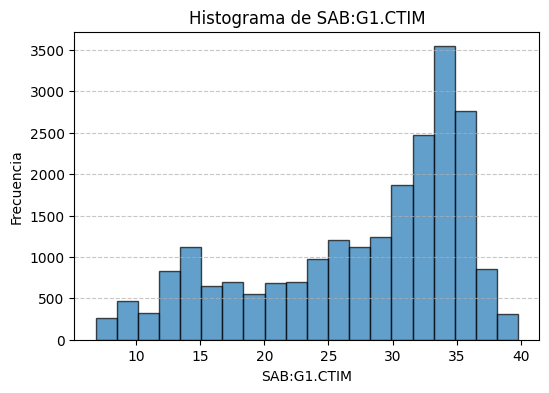

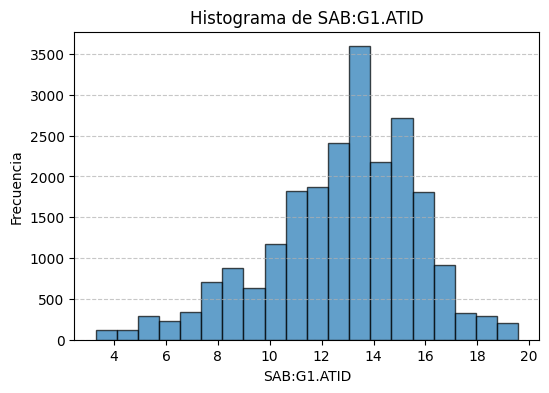

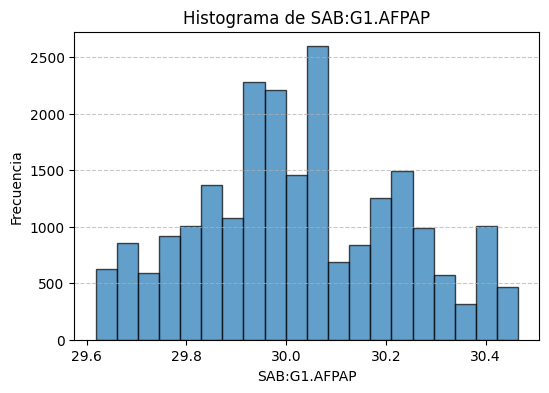

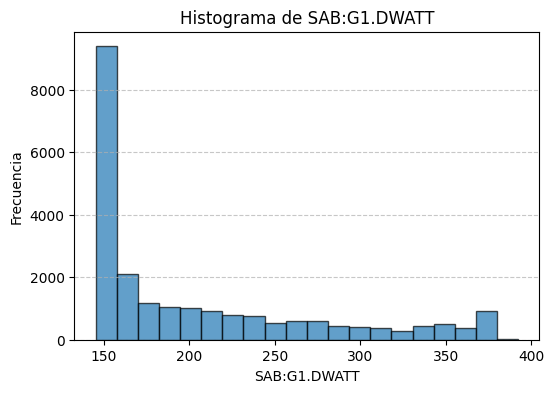

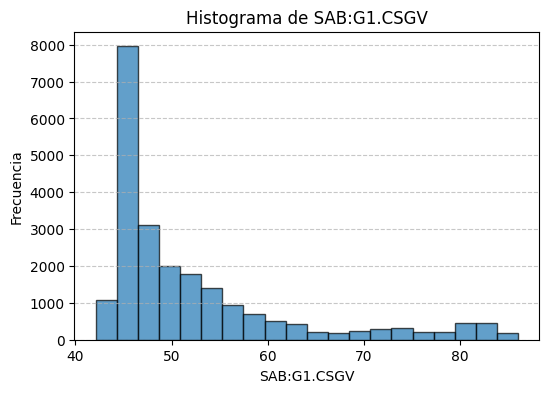

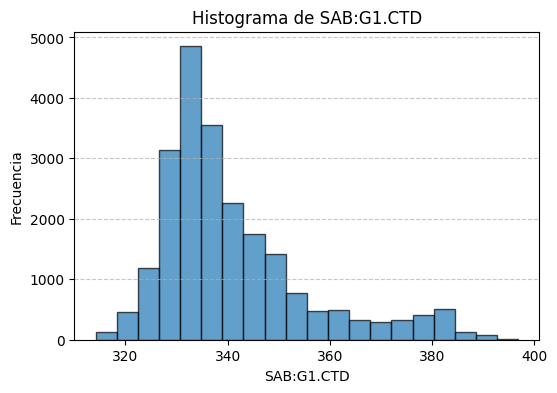

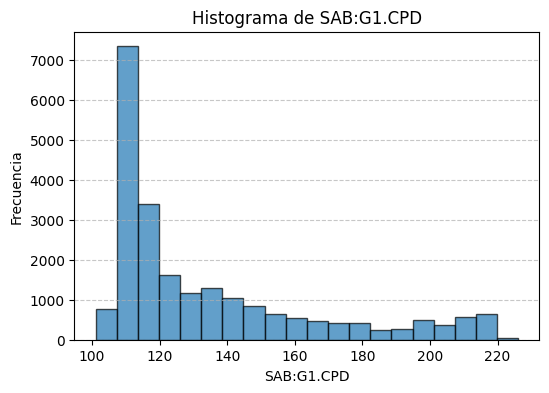

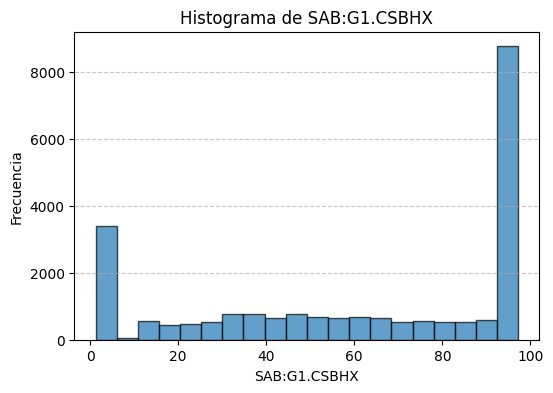

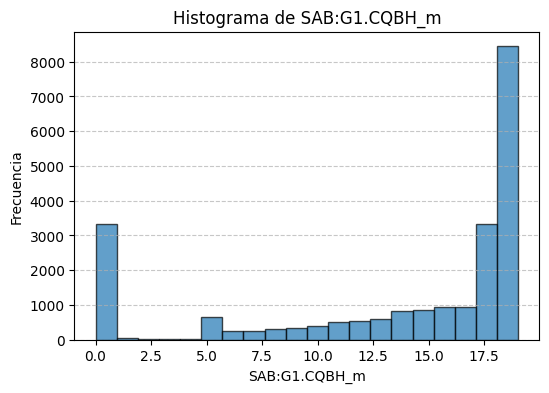

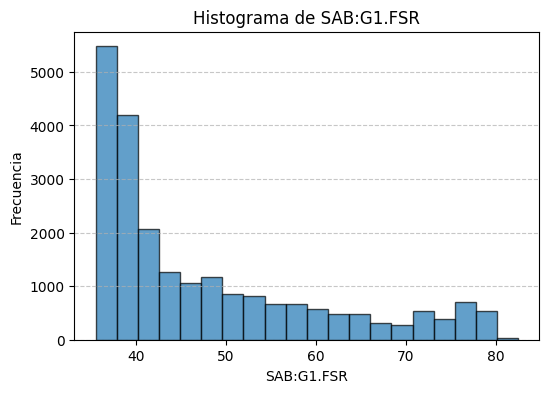

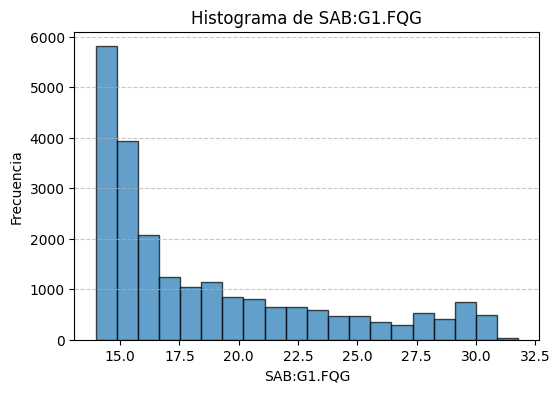

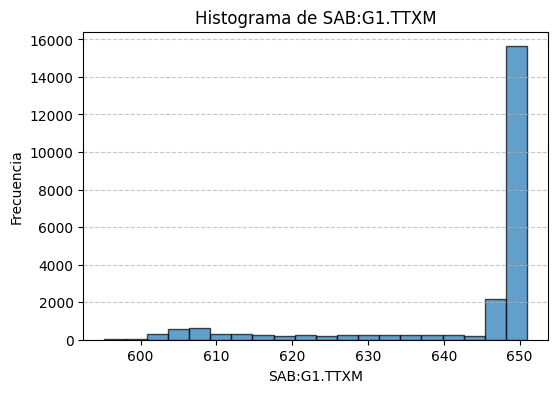

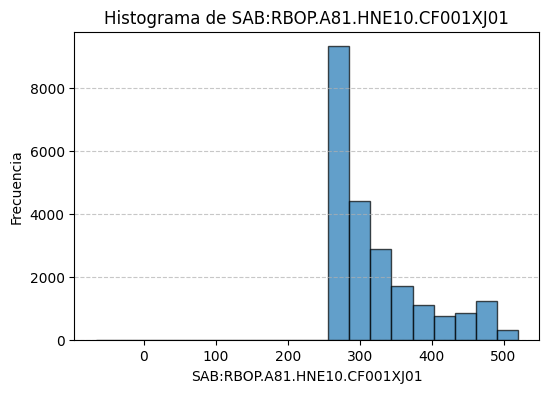

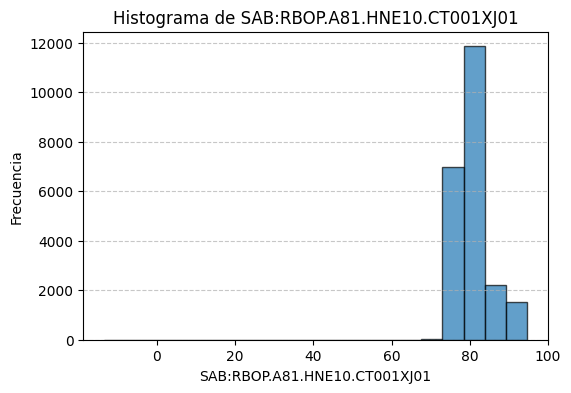

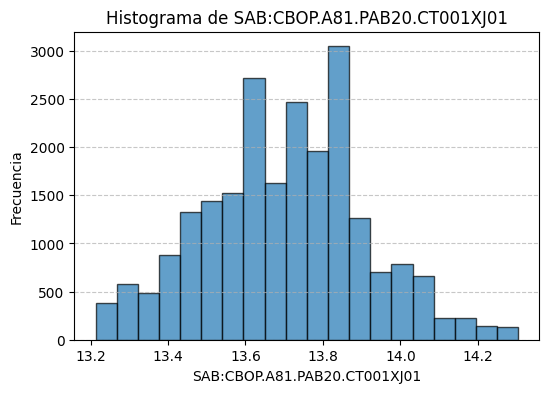

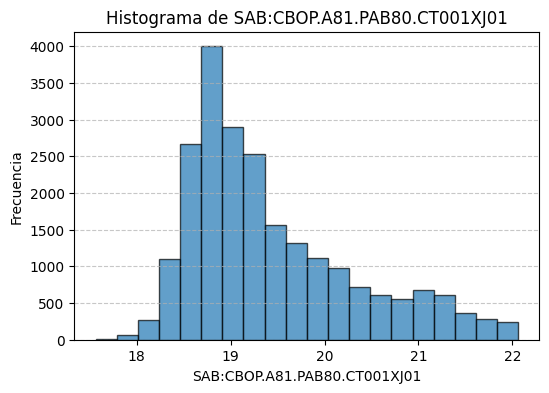

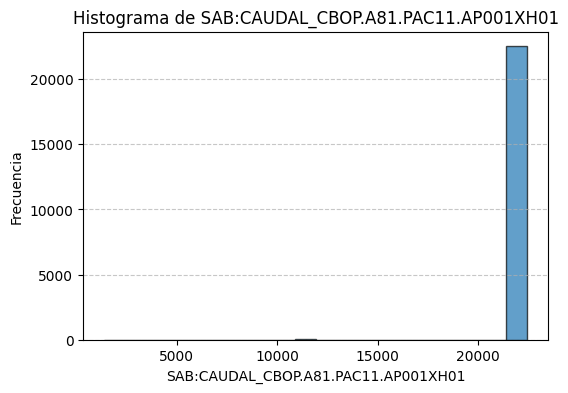

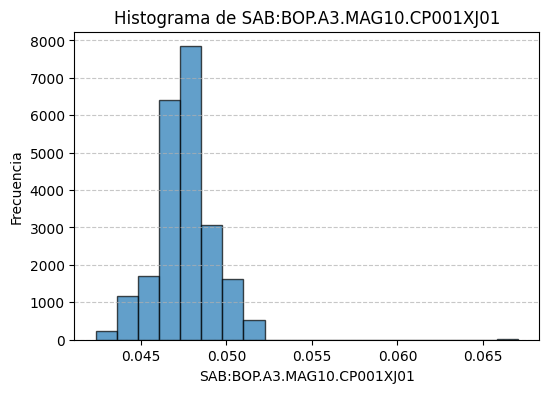

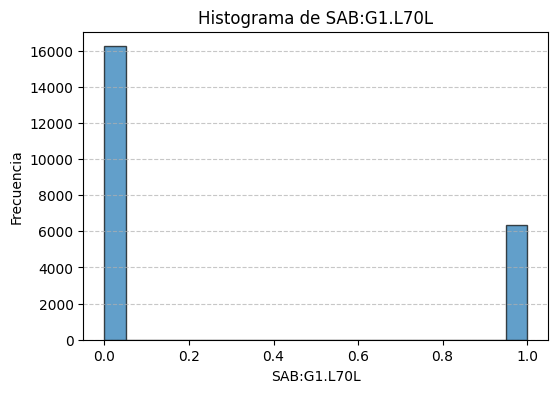

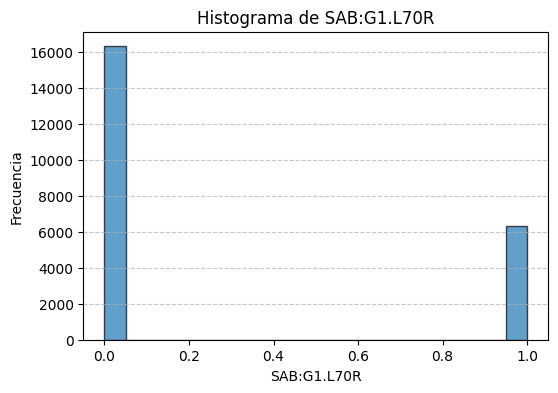

In [56]:
 # Filtrar solo columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns

# Crear histogramas para cada columna numérica
for columna in columnas_numericas:
    plt.figure(figsize=(6, 4))
    plt.hist(df[columna].dropna(), bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

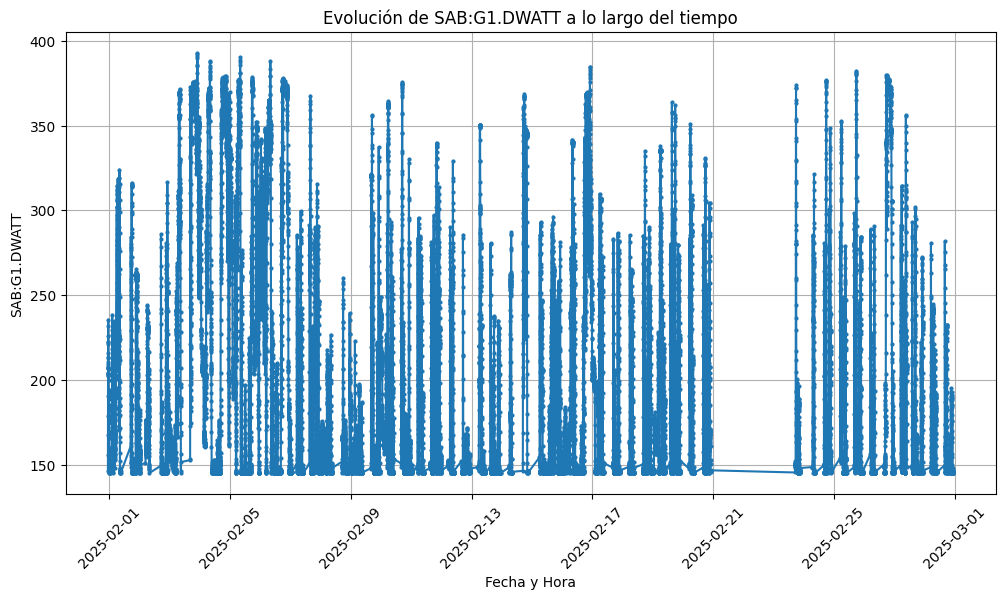

In [57]:
# Definir la columna de tiempo y la que quieres graficar
columna_tiempo = df.columns[0]  # Suponiendo que la primera columna es datetime
columna_valor = "SAB:G1.DWATT"  # Reemplázalo con la columna que quieres graficar

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(df[columna_tiempo], df[columna_valor], marker='o', linestyle='-', markersize=2)

# Personalizar el gráfico
plt.xlabel("Fecha y Hora")
plt.ylabel(columna_valor)
plt.title(f"Evolución de {columna_valor} a lo largo del tiempo")
plt.xticks(rotation=45)
plt.grid()

# Mostrar el gráfico
plt.show()